# Image segmentation


In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Scaling image factor
##### scale_percent = 50
##### width = int((img.shape[1] * scale_percent )/100)
##### height = int((img.shape[0] *scale_percent ) / 100)
##### dsize = (width,height)
##### cv2.resize(img,dsize)


# Reading the image


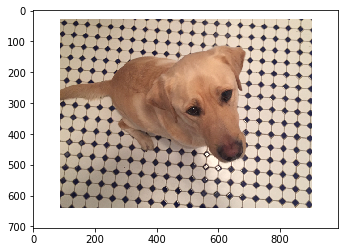

In [23]:
img = cv2.imread("C:\\Users\gagan\Desktop\Coding Blocks\download.png")
# cv2.imshow("image1",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
original_shape = img.shape

In [24]:
#FLATTEN EACH CHANNEL ALL THE VALUES
all_pixels = img.reshape((-1,3))

In [25]:
all_pixels.shape

(697950, 3)

In [26]:
from sklearn.cluster import KMeans

In [27]:
dominant_colors = 2
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
centers =km.cluster_centers_

In [29]:
centers = np.array(centers,dtype="uint8")

In [30]:
centers

array([[235, 225, 215],
       [135, 107,  94]], dtype=uint8)

# PLOT COLORS

[235 225 215]
[135 107  94]


<function matplotlib.pyplot.show(*args, **kw)>

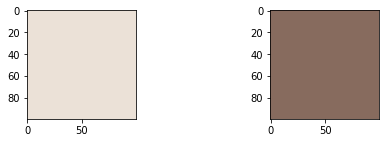

In [31]:
i = 1
plt.figure(0, figsize=(8,2))

colors = []
for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    print(each_col)
    i +=1
    colors.append(each_col)
    #color swatch
    a = np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]  = each_col
    plt.imshow(a)
plt.show

# SEGMENTATION

In [32]:
w,h,z = original_shape
new_img = np.zeros((w*h,z),dtype="uint8")


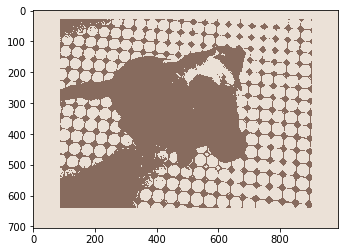

In [33]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

In [34]:
km.labels_[10:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])